In [1]:
%load_ext autoreload
%autoreload 2
import hmdsetup
import lmpsetup
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
import analysis

In [50]:
temperatures = [300., 354.55, 390.91, 427.27]
lmpsetup.LMPSetup(protein='CPEB4', 
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HMDvsLMP', 
                  chains=1, 
                  save=5000,
                  temper=False,
                  box_size=50,
                  t=int(1e9),
                  processors=4,
                  charge_scale=0,
                  temperatures=temperatures).write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HMDvsLMP for CPEB4     ║
║------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                             ║
║       - Model = HPS                                                                      ║
║       - Chains = 1                                                                       ║
║       - Ionic Strength (mM) = 0.1                                                        ║
║       - Medium Permittivity = 80.0                                                       ║
║       - Temperatures (K) = [300.0, 354.55, 390.91, 427.27]                               ║
║       - HPS Scale = 1.0                                                                  ║
╚═════════════════════════════════════════════════════════════════════

In [80]:
temperatures = [300., 354.55, 390.91, 427.27]
for temp in temperatures:
    hmdsetup.HMDSetup(protein='CPEB4', 
                      oliba_wd='/home/adria/irb/prod/test', 
                      chains=1, 
                      save=5000,
                      box_size=200,
                      t=int(1e9),
                      temperature=temp).write_hps_files()

In [31]:
temperatures = [300., 354.55, 390.91, 427.27]
trs = []
rgs = []
for temp in temperatures:
    tr = md.load(f'/home/adria/irb/prod/test/trajectory_{temp:.0f}.dcd', top='/home/adria/irb/prod/test/topo.pdb')
    rg = md.compute_rg(tr).mean()*100.
    print(rg)
    rgs.append(rg)

48.70974316403291
65.87521740644424
77.49191677999335
82.45920377208698


> Run Completed at 83.78% for CPEB4. Ran 83785000 steps for a total of 16758 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


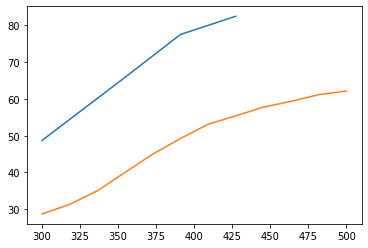

In [80]:
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4/x1/1.0ls-100I-80e')
rgs_lmp = t.rg().mean(axis=1)
plt.plot(temperatures, rgs)
plt.plot(t.temperatures, rgs_lmp)

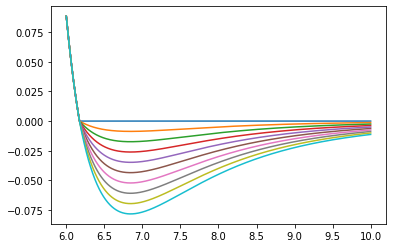

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def HPS_potential(rr, eps, lambd, sigma):
    Vs = []
    for r in rr:
        V = 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)
        F = 4 * eps / r * (12 * (sigma / r) ** 12 - 6 * (sigma / r) ** 6)
        if r <= 2 ** (1 / 6) * sigma:
            V = V + (1 - lambd) * eps
        else:
            V = lambd * V
            F = lambd * F
#         Vs.append(V)
        Vs.append(F)
    return np.array(Vs)


r = np.linspace(6, 10, 1000)

lambdas = np.arange(0, 1, 0.1)

for l in lambdas:
    plt.plot(r, HPS_potential(r, eps=0.2, lambd=l, sigma=5.5))


> Run Completed at 100.00% for None. Ran 2000 steps for a total of 2001 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
(2001, 2, 3)
(1, 2001, 8)
4.5
4.8


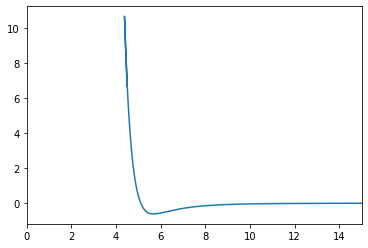

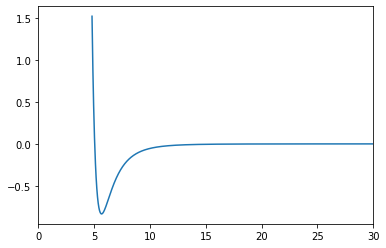

In [45]:
#LAMMPS
s = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HMDvsLMP/LJTEST', equil_frames=0)
print(s.structures[0].xyz.shape)
print(s.data.shape)
plt.xlim(0,15)
d = np.linalg.norm(s.structures[0].xyz[:,0,:]-s.structures[0].xyz[:,1,:], axis=1)*10.
print(d[0])

plt.plot(d[:], s.data[0,:,1]*4.184)

plt.figure()
# HOOMD
tr = md.load('/home/adria/irb/prod/ljtest/trajectory_300.dcd', top='/home/adria/irb/prod/ljtest/topo.pdb')
dh = np.linalg.norm(tr.xyz[:,0,:]-tr.xyz[:,1,:], axis=1)*100.
print(dh[0])
plt.xlim(0,30)
with open('/home/adria/irb/prod/ljtest/log_300.log', 'r') as log:
    l = log.readlines()[1:]
data = np.genfromtxt(l)
plt.plot(dh[:], data[:,1])

> Run Completed at 100.00% for None. Ran 2000 steps for a total of 2001 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
(2001, 2, 3)
(1, 2001, 8)
4.5
4.8


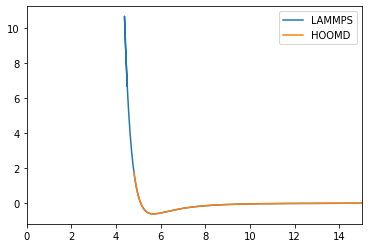

In [63]:
#LAMMPS
s = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HMDvsLMP/LJTEST', equil_frames=0)
print(s.structures[0].xyz.shape)
print(s.data.shape)
plt.xlim(0,15)
d = np.linalg.norm(s.structures[0].xyz[:,0,:]-s.structures[0].xyz[:,1,:], axis=1)*10.
print(d[0])

plt.plot(d[:], s.data[0,:,1]*4.184, label='LAMMPS')

# HOOMD
tr = md.load('/home/adria/irb/prod/ljtest/trajectory_300.dcd', top='/home/adria/irb/prod/ljtest/topo.pdb')
dh = np.linalg.norm(tr.xyz[:,0,:]-tr.xyz[:,1,:], axis=1)*100.
print(dh[0])
plt.xlim(0,15)
with open('/home/adria/irb/prod/ljtest/log_300.log', 'r') as log:
    l = log.readlines()[1:]
data = np.genfromtxt(l)
plt.plot(dh[:], data[:,1], label='HOOMD')
plt.legend()